In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('Heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [75]:
df[df.Cholesterol==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


## Checking Null Values

In [4]:
df.replace("None",np.nan,inplace=True)
df.dropna(inplace=True)
df.shape

(918, 12)

## Label Encoding the Columns

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for columns in columns:
    df[columns]=labelencoder.fit_transform(df[columns])
    
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Scaling the columns to have similar variance

In [6]:
X=df.drop('HeartDisease',axis=1)
y=df.HeartDisease

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:]

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

## Preparing input and output

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.15)

# Model Selection

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [11]:
lr.score(X_test,y_test)

0.8913043478260869

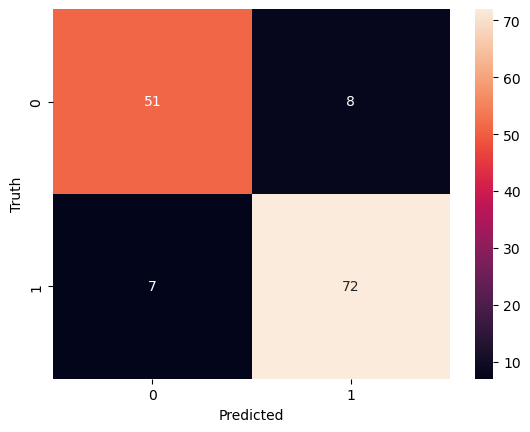

In [12]:
from sklearn.metrics import confusion_matrix

y_pred=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Decision Tree

In [13]:
from sklearn import tree

In [14]:
dt=tree.DecisionTreeClassifier(max_depth=30)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30)

In [15]:
dt.score(X_test,y_test)

0.7898550724637681

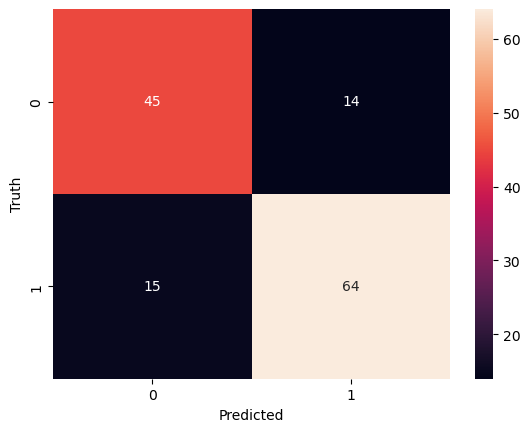

In [16]:
from sklearn.metrics import confusion_matrix

y_pred=dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Support Vector Classifier

In [17]:
from sklearn.svm import SVC

### Linear SVC

In [18]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
svc.score(X_test,y_test)

0.8623188405797102

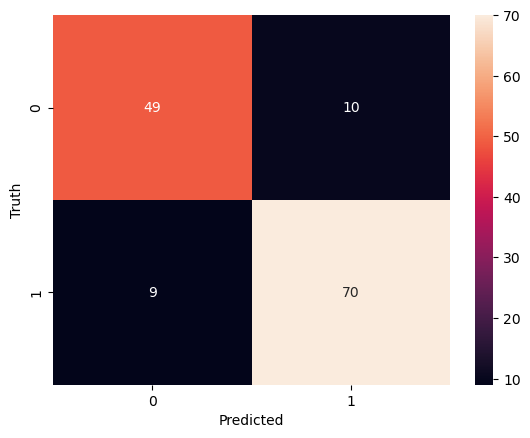

In [20]:
from sklearn.metrics import confusion_matrix

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Polynomial SVC

In [21]:
svc=SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [22]:
svc.score(X_test,y_test)

0.855072463768116

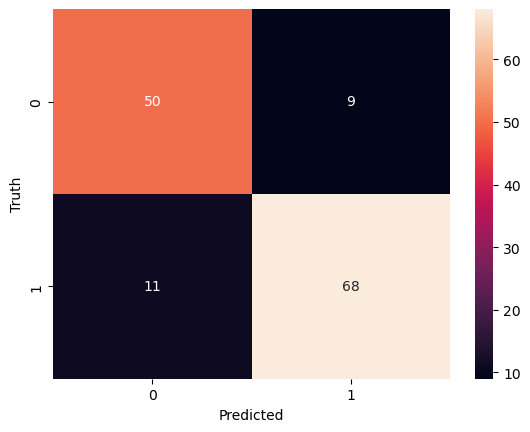

In [23]:
from sklearn.metrics import confusion_matrix

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Radial Basis SVC

In [24]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [25]:
svc.score(X_test,y_test)

0.8840579710144928

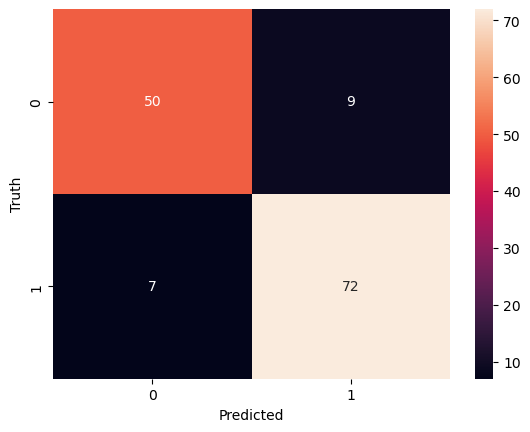

In [26]:
from sklearn.metrics import confusion_matrix

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Sigmoid SVC

In [27]:
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [28]:
svc.score(X_test,y_test)

0.8333333333333334

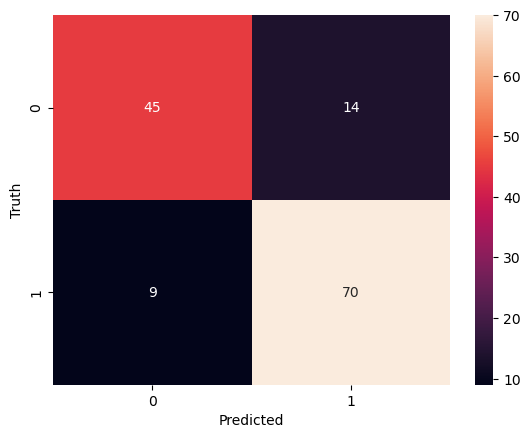

In [29]:
from sklearn.metrics import confusion_matrix

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Grid Search SVC

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.01,0.1,0.5,1,10,100],
            'gamma':[1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
            'kernel':['linear','poly','rbf','sigmoid']
           }

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


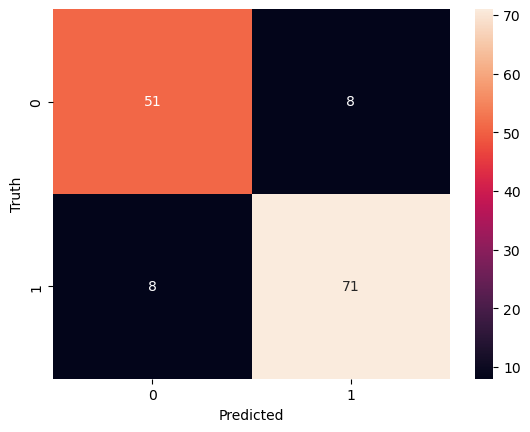

In [31]:
from sklearn.metrics import confusion_matrix

y_pred=grid.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Principal Component Analysis

### Manually Setting number of dimensions

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca=PCA(n_components=3)
X_decomposed=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92021836, 0.04913303, 0.02508167])

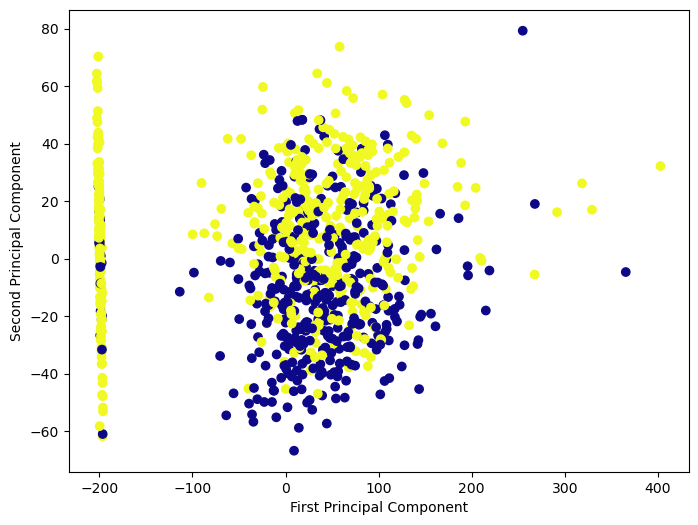

In [34]:
plt.figure(figsize=(8,6))

plt.scatter(X_decomposed[:,0],X_decomposed[:,1],c=y,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_decomposed,y,test_size=0.15)

In [36]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.6956521739130435

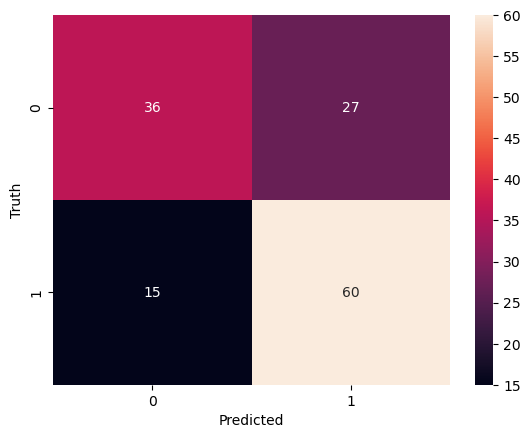

In [37]:
from sklearn.metrics import confusion_matrix

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [43]:
# # Create a coarser mesh grid
# h = .1  # Increase the step size in the mesh to reduce memory usage
# x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
# y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # Predict the class for each point in the mesh grid
# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot the decision boundary and the training points
# plt.contourf(xx, yy, Z, alpha=0.8)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=20)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title('SVC with RBF kernel')
# plt.show()

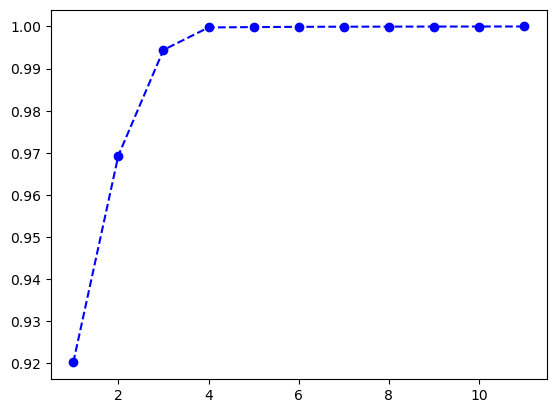

In [39]:
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
plt.plot(range(1,1+len(cumsum)),cumsum,linestyle='--',color='b',marker='o')

## K Nearest Neighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
knc.score(X_test,y_test)

0.644927536231884

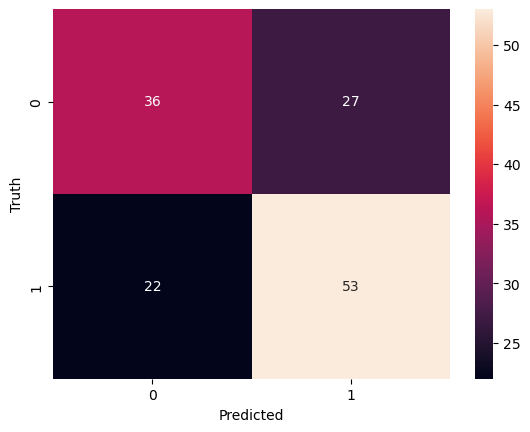

In [42]:
from sklearn.metrics import confusion_matrix

y_pred=knc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()